In [113]:
import yfinance as yf
import pandas as pd
from datetime import datetime
from pprint import pprint
import matplotlib.pyplot as plt

# pprint(plt.style.available)
# plt.style.use('ggplot')

# APPL 
df = yf.download('MSFT', start = '2023-06-21', end='2024-06-20')

# Data manipulation for visualization
df['day'] = df.index.day
df['month']= df.index.month
df['volume'] = df['Volume']/1000000
df.tail(5)



[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,day,month,volume
Date,,,,,,,,,
2024-06-12,435.320007,443.399994,433.250000,441.059998,441.059998,22366200,12,6,22.3662
2024-06-13,440.850006,443.390015,439.369995,441.579987,441.579987,15960600,13,6,15.9606
2024-06-14,438.279999,443.140015,436.720001,442.570007,442.570007,13582000,14,6,13.5820
2024-06-17,442.589996,450.940002,440.720001,448.369995,448.369995,20790000,17,6,20.7900
2024-06-18,449.709991,450.140015,444.890015,446.339996,446.339996,17112500,18,6,17.1125


In [114]:

plot_df =df[['month','day','volume']].reset_index()
plot_df = plot_df.pivot(index= 'month', columns= 'day', values='volume' )
plot_df.fillna(0, inplace=True)

plot_df2 = plot_df

plot_df.head()

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,0.0000,25.2586,23.0835,20.9015,20.9870,0.0000,0.0000,23.1340,20.8300,25.5142,...,27.0169,20.5259,24.8670,21.0212,17.8033,0.0000,0.0000,24.5102,33.4776,47.8711
2,30.6577,28.2450,0.0000,0.0000,25.3523,18.3826,22.3405,21.2253,22.0328,0.0000,...,27.0099,16.2959,0.0000,0.0000,16.1935,14.8358,13.1831,31.9473,0.0000,0.0000
3,17.8003,0.0000,0.0000,17.5960,26.9192,22.3441,18.7185,17.9717,0.0000,0.0000,...,17.6365,0.0000,0.0000,18.0605,16.7256,16.7050,21.8712,0.0000,0.0000,0.0000
4,16.3160,17.9120,16.5023,19.3709,16.5443,0.0000,0.0000,14.2724,12.5123,16.2166,...,20.2869,15.7345,15.0653,40.5865,29.6947,0.0000,0.0000,19.5821,28.7814,0.0000
5,23.5625,17.7094,17.4467,0.0000,0.0000,16.9966,20.0182,11.7923,14.6897,13.4023,...,18.0737,17.2117,11.8458,0.0000,0.0000,0.0000,15.7180,15.5171,28.4248,47.9953


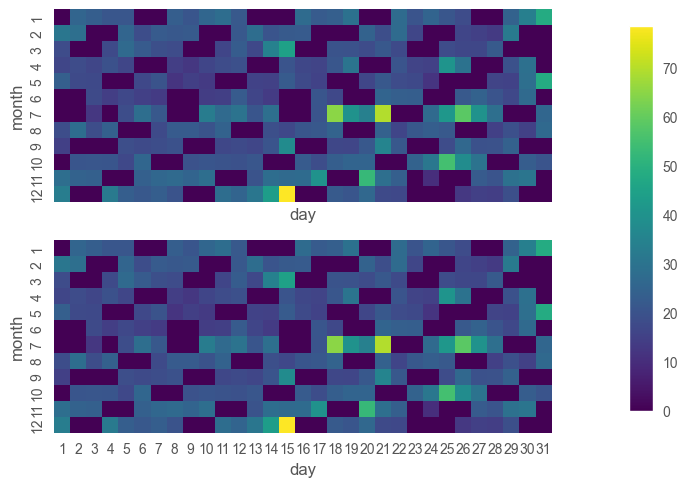

In [123]:

import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors

# sns.color_palette("viridis", as_cmap=True)
def create_accuracy_het_map(df, **kwargs):
    ax_m = sns.heatmap(df, annot=False ,square=True, ** kwargs,cmap='viridis', cbar=False,)
    # ax_m.set(xlabel=xlabel, ylabel=ylabel)
    # ax_m.xaxis.tick_top()

    return


fig , axs = plt.subplots( 2,sharex=True, sharey=True )
values = np.hstack([d.values.ravel() for d in [plot_df, plot_df2]])
norm = mcolors.Normalize(values.min(), values.max()) 
# fig.tight_layout(rect=[0, 0, 0.9, 1])

# Create a color bar axis
cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])

# Add a color bar to the figure
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
fig.colorbar(sm, cbar_ax)


ax1 = create_accuracy_het_map(plot_df, ax=axs[0], norm=norm)

ax2 = create_accuracy_het_map(plot_df2, ax=axs[1], norm=norm)




# plt.show()

      

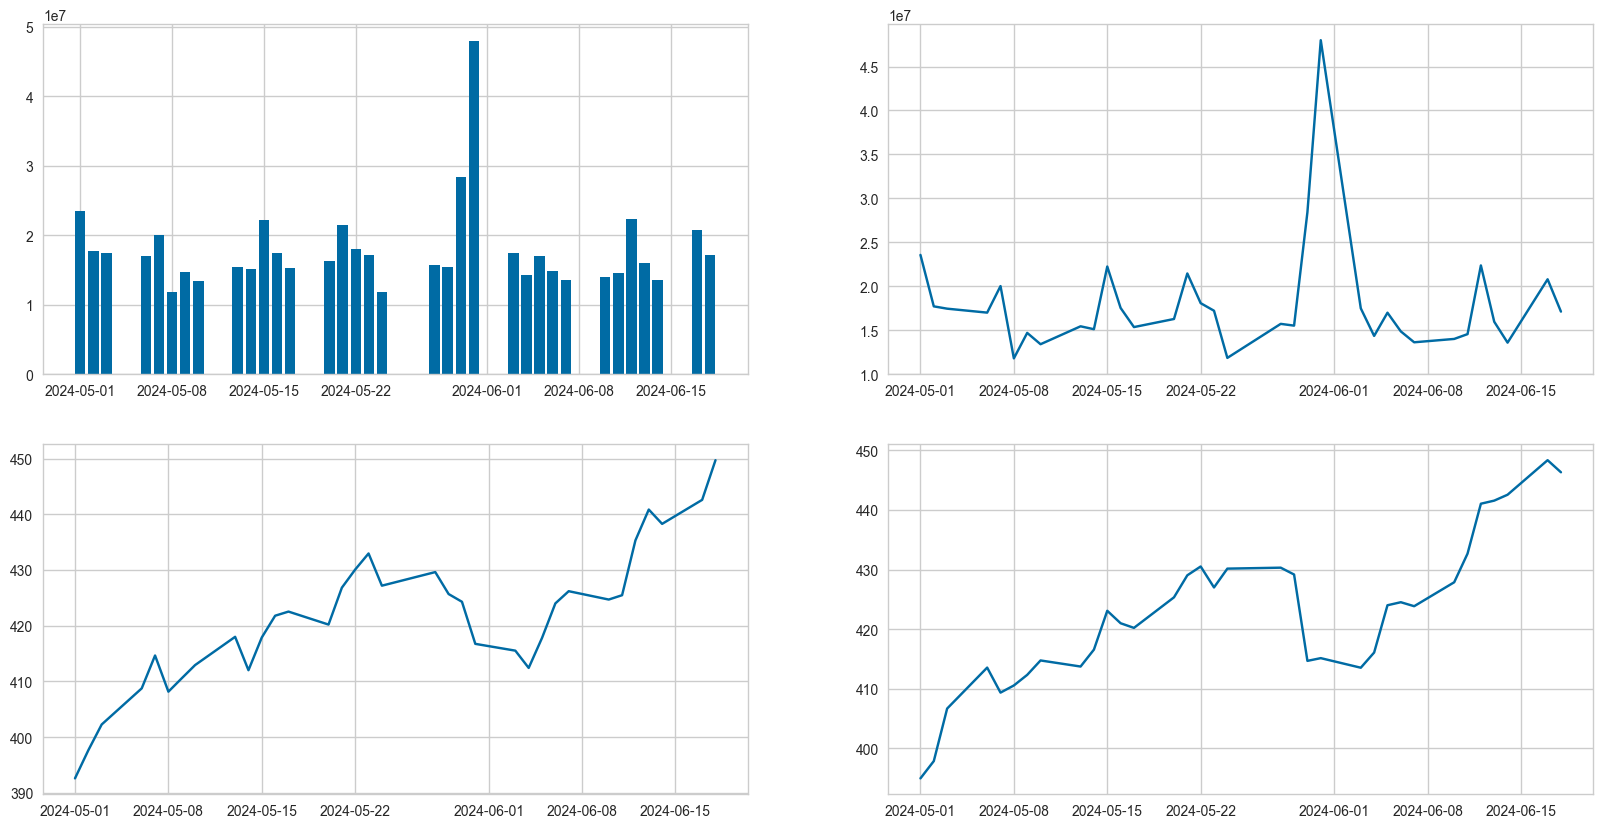

In [11]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.bar(x=df.index, height=df['Volume'])

plt.subplot(2,2,2)

plt.plot(df.index,df['Volume'])

plt.subplot(2,2,3)

plt.plot(df.index,df['Open'])

plt.subplot(2,2,4)

plt.plot(df.index,df['Close'])


plt.show()